## Importação da Bibliotecas

- Neste bloco, importamos todas as ferramentas (bibliotecas) que serão necessárias para a análise, pré-processamento, modelagem e avaliação.
---

In [46]:
# --- Bibliotecas para Manipulação e Análise de Dados ---
import pandas as pd
import numpy as np

# --- Bibliotecas para Visualização de Dados ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Ferramentas para Pré-processamento e Preparação dos Dados ---
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # Pipeline especial para usar com SMOTE

# --- Ferramentas para Modelagem Preditiva ---
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# --- Ferramentas para Otimização de Hiperparâmetros ---
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# --- Ferramentas para Avaliação de Modelos ---
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)

# --- Configurações do Ambiente ---
import warnings
warnings.filterwarnings('ignore') # Ignora avisos não críticos para uma saída mais limpa.
# Exibe os gráficos diretamente no notebook
%matplotlib inline

# Análise Exploratória de Dados (EDA)

## Carregamento e Verificação Inicial dos Dados

- Carregamos o dataset pré-processado a partir de uma URL e verificamos sua estrutura inicial. Este CSV já contém as variáveis tratadas e prontas para a modelagem.
---

In [47]:
# URL do arquivo de dados já pré-processado na etapa anterior do desafio.
url = 'https://raw.githubusercontent.com/LuisComS8592/TelecomX_BR/refs/heads/main/data/TelecomX_Data_model.csv'

# Carrega os dados para um DataFrame do pandas.
# O pandas é a ferramenta ideal para trabalhar com dados tabulares como este.
dados = pd.read_csv(url)

# Exibe as 5 primeiras linhas do DataFrame para uma inspeção visual rápida.
# Isso nos ajuda a confirmar que os dados foram carregados corretamente e a entender a estrutura das colunas.
print("As 5 primeiras linhas dos dados:")
display(dados.head())

# Exibe as dimensões do DataFrame (número de linhas, número de colunas).
# É uma verificação fundamental para saber o volume de dados com que estamos lidando.
print(f"\nO dataset possui {dados.shape[0]} linhas e {dados.shape[1]} colunas.")

As 5 primeiras linhas dos dados:


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_onlinesecurity,...,account_charges_monthly,account_charges_total,daily_account,internet_internetservice_Fiber optic,internet_internetservice_No,account_contract_One year,account_contract_Two year,account_paymentmethod_Credit card (automatic),account_paymentmethod_Electronic check,account_paymentmethod_Mailed check
0,0002-ORFBO,0,1,0,1,1,9,1,0,0,...,65.6,593.30,2.186667,False,False,True,False,False,False,True
1,0003-MKNFE,0,0,0,0,0,9,1,1,0,...,59.9,542.40,1.996667,False,False,False,False,False,False,True
2,0004-TLHLJ,1,0,0,0,0,4,1,0,0,...,73.9,280.85,2.463333,True,False,False,False,False,True,False
3,0011-IGKFF,1,0,1,1,0,13,1,0,0,...,98.0,1237.85,3.266667,True,False,False,False,False,True,False
4,0013-EXCHZ,1,1,1,1,0,3,1,0,0,...,83.9,267.40,2.796667,True,False,False,False,False,False,True



O dataset possui 7267 linhas e 26 colunas.


## Preparação Final e Separação em Features (X) e Alvo (y)

- Garantimos que colunas de identificação foram removidas e separamos o conjunto de dados em duas partes: as variáveis que usaremos para fazer a previsão (X) e a variável que queremos prever (y).
---

In [48]:
# Verificação de segurança: checa se a coluna 'customerid' existe antes de tentar removê-la.
# Isso torna o código mais robusto e evita erros caso o script seja executado com um dataset já limpo.
if 'customerid' in dados.columns:
    dados = dados.drop(columns=['customerid'])
    print("Coluna 'customerid' foi removida com sucesso.")
else:
    print("Coluna 'customerid' não encontrada. Nenhuma ação foi necessária.")


# --- Separação dos Dados ---

# X (Features/Variáveis Independentes): Contém todas as colunas, exceto a nossa variável alvo 'churn'.
# O parâmetro 'axis=1' indica que estamos removendo uma coluna.
X = dados.drop('churn', axis=1)

# y (Target/Variável Dependente): Contém apenas a coluna 'churn', que é o que o nosso modelo tentará prever.
y = dados['churn']


# --- Verificação Pós-Separação ---

# Exibe as 5 primeiras linhas das features para verificar se a separação ocorreu corretamente.
print("\nVariáveis preditoras (X) - 5 primeiras linhas:")
display(X.head())

# Exibe as 5 primeiras linhas da variável alvo para verificação.
print("\nVariável alvo (y) - 5 primeiras linhas:")
display(y.head())

# Confirma as dimensões de X e y para garantir que o número de linhas é o mesmo.
print(f"\nDimensões de X: {X.shape}")
print(f"Dimensões de y: {y.shape}")

Coluna 'customerid' foi removida com sucesso.

Variáveis preditoras (X) - 5 primeiras linhas:


,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,...,account_charges_monthly,account_charges_total,daily_account,internet_internetservice_Fiber optic,internet_internetservice_No,account_contract_One year,account_contract_Two year,account_paymentmethod_Credit card (automatic),account_paymentmethod_Electronic check,account_paymentmethod_Mailed check
0,1,0,1,1,9,1,0,0,1,0,...,65.6,593.30,2.186667,False,False,True,False,False,False,True
1,0,0,0,0,9,1,1,0,0,0,...,59.9,542.40,1.996667,False,False,False,False,False,False,True
2,0,0,0,0,4,1,0,0,0,1,...,73.9,280.85,2.463333,True,False,False,False,False,True,False
3,0,1,1,0,13,1,0,0,1,1,...,98.0,1237.85,3.266667,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0,0,0,0,...,83.9,267.40,2.796667,True,False,False,False,False,False,True



Variável alvo (y) - 5 primeiras linhas:


,churn
0,0
1,0
2,1
3,1
4,1



Dimensões de X: (7267, 24)
Dimensões de y: (7267,)


## Análise da Variável Alvo (Balanceamento de Classe)

- Analisamos a distribuição da nossa variável alvo ('churn') para entender o balanceamento das classes. Identificar um desbalanceamento aqui é crucial, pois pode afetar o treinamento e a avaliação do modelo.
---

--- Análise da Variável Alvo 'churn' ---

Contagem Absoluta:
churn
0    5398
1    1869
Name: count, dtype: int64

Proporção Percentual:
Clientes Ativos (0): 74.28%
Clientes em Churn (1): 25.72%

Insight: O dataset é desbalanceado, com uma minoria significativa de clientes em churn.


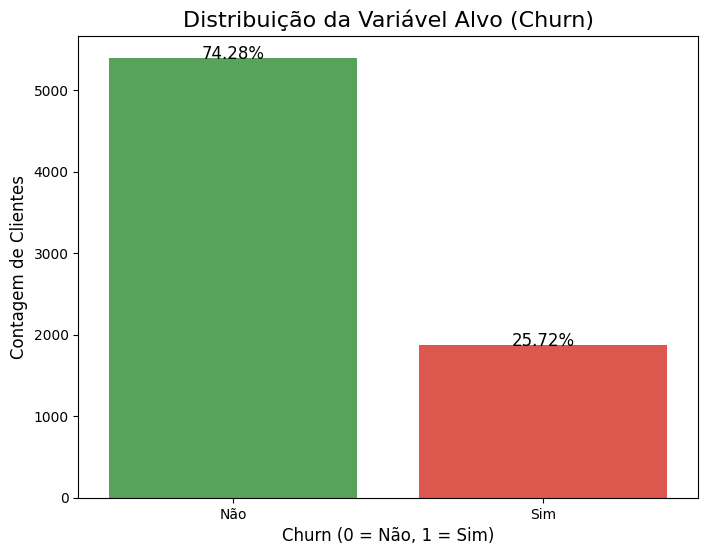

In [49]:
# --- Análise Numérica ---

# Calcula a contagem absoluta de cada classe (0 para 'Não', 1 para 'Sim').
# 'value_counts()' é a função perfeita para essa contagem.
contagem_churn = y.value_counts()

# Calcula a proporção percentual de cada classe usando 'normalize=True'.
proporcao_churn = y.value_counts(normalize=True) * 100

# Exibe os resultados formatados para clareza.
print("--- Análise da Variável Alvo 'churn' ---")
print("\nContagem Absoluta:")
print(contagem_churn)
print("\nProporção Percentual:")
# Usamos f-strings para uma exibição mais limpa e formatada dos percentuais.
print(f"Clientes Ativos (0): {proporcao_churn[0]:.2f}%")
print(f"Clientes em Churn (1): {proporcao_churn[1]:.2f}%")
print("\nInsight: O dataset é desbalanceado, com uma minoria significativa de clientes em churn.")


# --- Análise Visual ---

# Define o tamanho da figura para o gráfico.
plt.figure(figsize=(8, 6))

# Cria um gráfico de contagem usando Seaborn, que é ideal para variáveis categóricas.
# As cores foram escolhidas para representar 'ativo' (verde) e 'churn' (vermelho).
ax = sns.countplot(x=y, palette=['#4CAF50', '#F44336'])

# Configurações do gráfico para melhor entendimento.
plt.title('Distribuição da Variável Alvo (Churn)', fontsize=16)
plt.xlabel('Churn (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)
plt.xticks([0, 1], ['Não', 'Sim']) # Renomeia os ticks do eixo x para maior clareza

# Adiciona os rótulos de porcentagem no topo de cada barra.
total = len(y)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 50, # Posição do texto um pouco acima da barra
            f'{100 * height / total:.2f}%', # Formata o texto como porcentagem
            ha="center", va="center", fontsize=12, color='black')

# Exibe o gráfico.
plt.show()

## Análise de Correlação

- Investigamos a correlação entre as variáveis para entender quais fatores estão mais associados ao churn. A correlação mede a força de uma relação linear entre duas variáveis (varia de -1, correlação negativa perfeita, a +1, correlação positiva perfeita).
---

--- Correlação das Variáveis com 'churn' ---

TOP 5 - Maior correlação POSITIVA (fatores que AUMENTAM a chance de churn):
internet_internetservice_Fiber optic      0.300949
account_paymentmethod_Electronic check    0.294626
account_charges_monthly                   0.189866
daily_account                             0.189866
account_paperlessbilling                  0.186666
Name: churn, dtype: float64

TOP 5 - Maior correlação NEGATIVA (fatores que DIMINUEM a chance de churn):
account_contract_One year     -0.173958
account_charges_total         -0.193345
internet_internetservice_No   -0.224051
account_contract_Two year     -0.295138
customer_tenure               -0.344079
Name: churn, dtype: float64


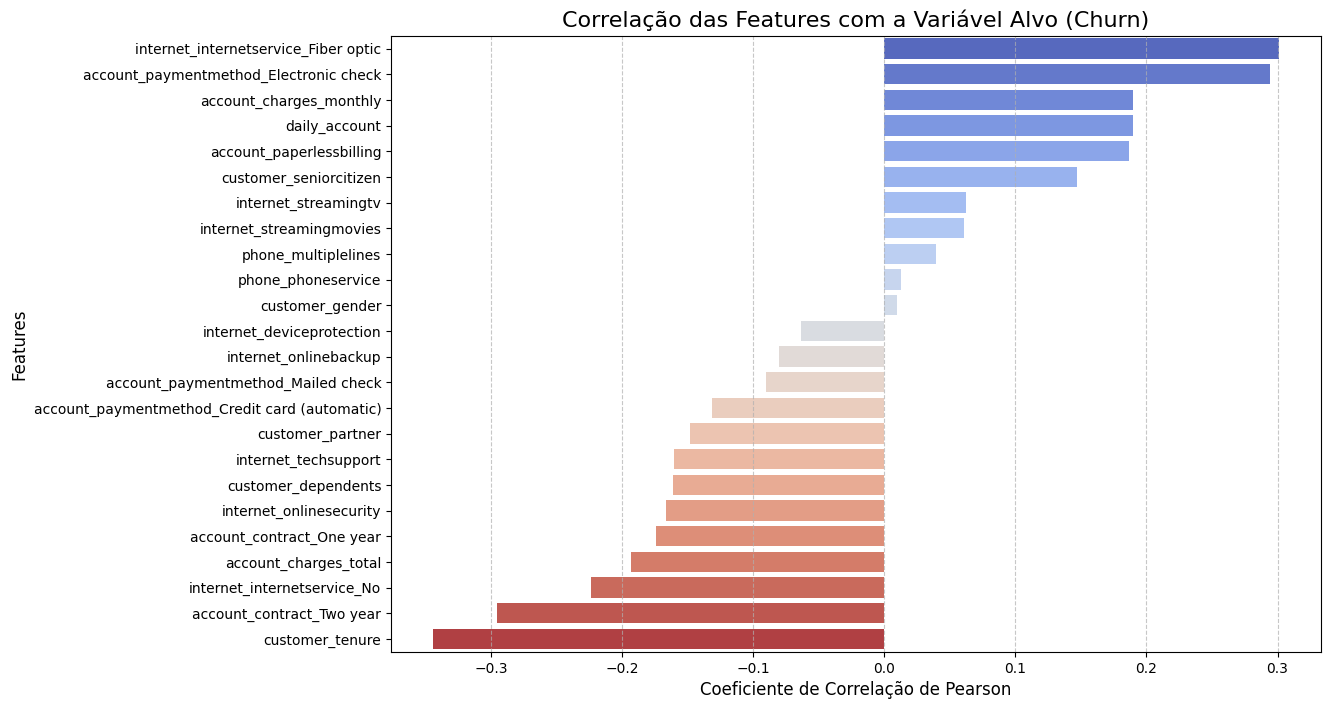

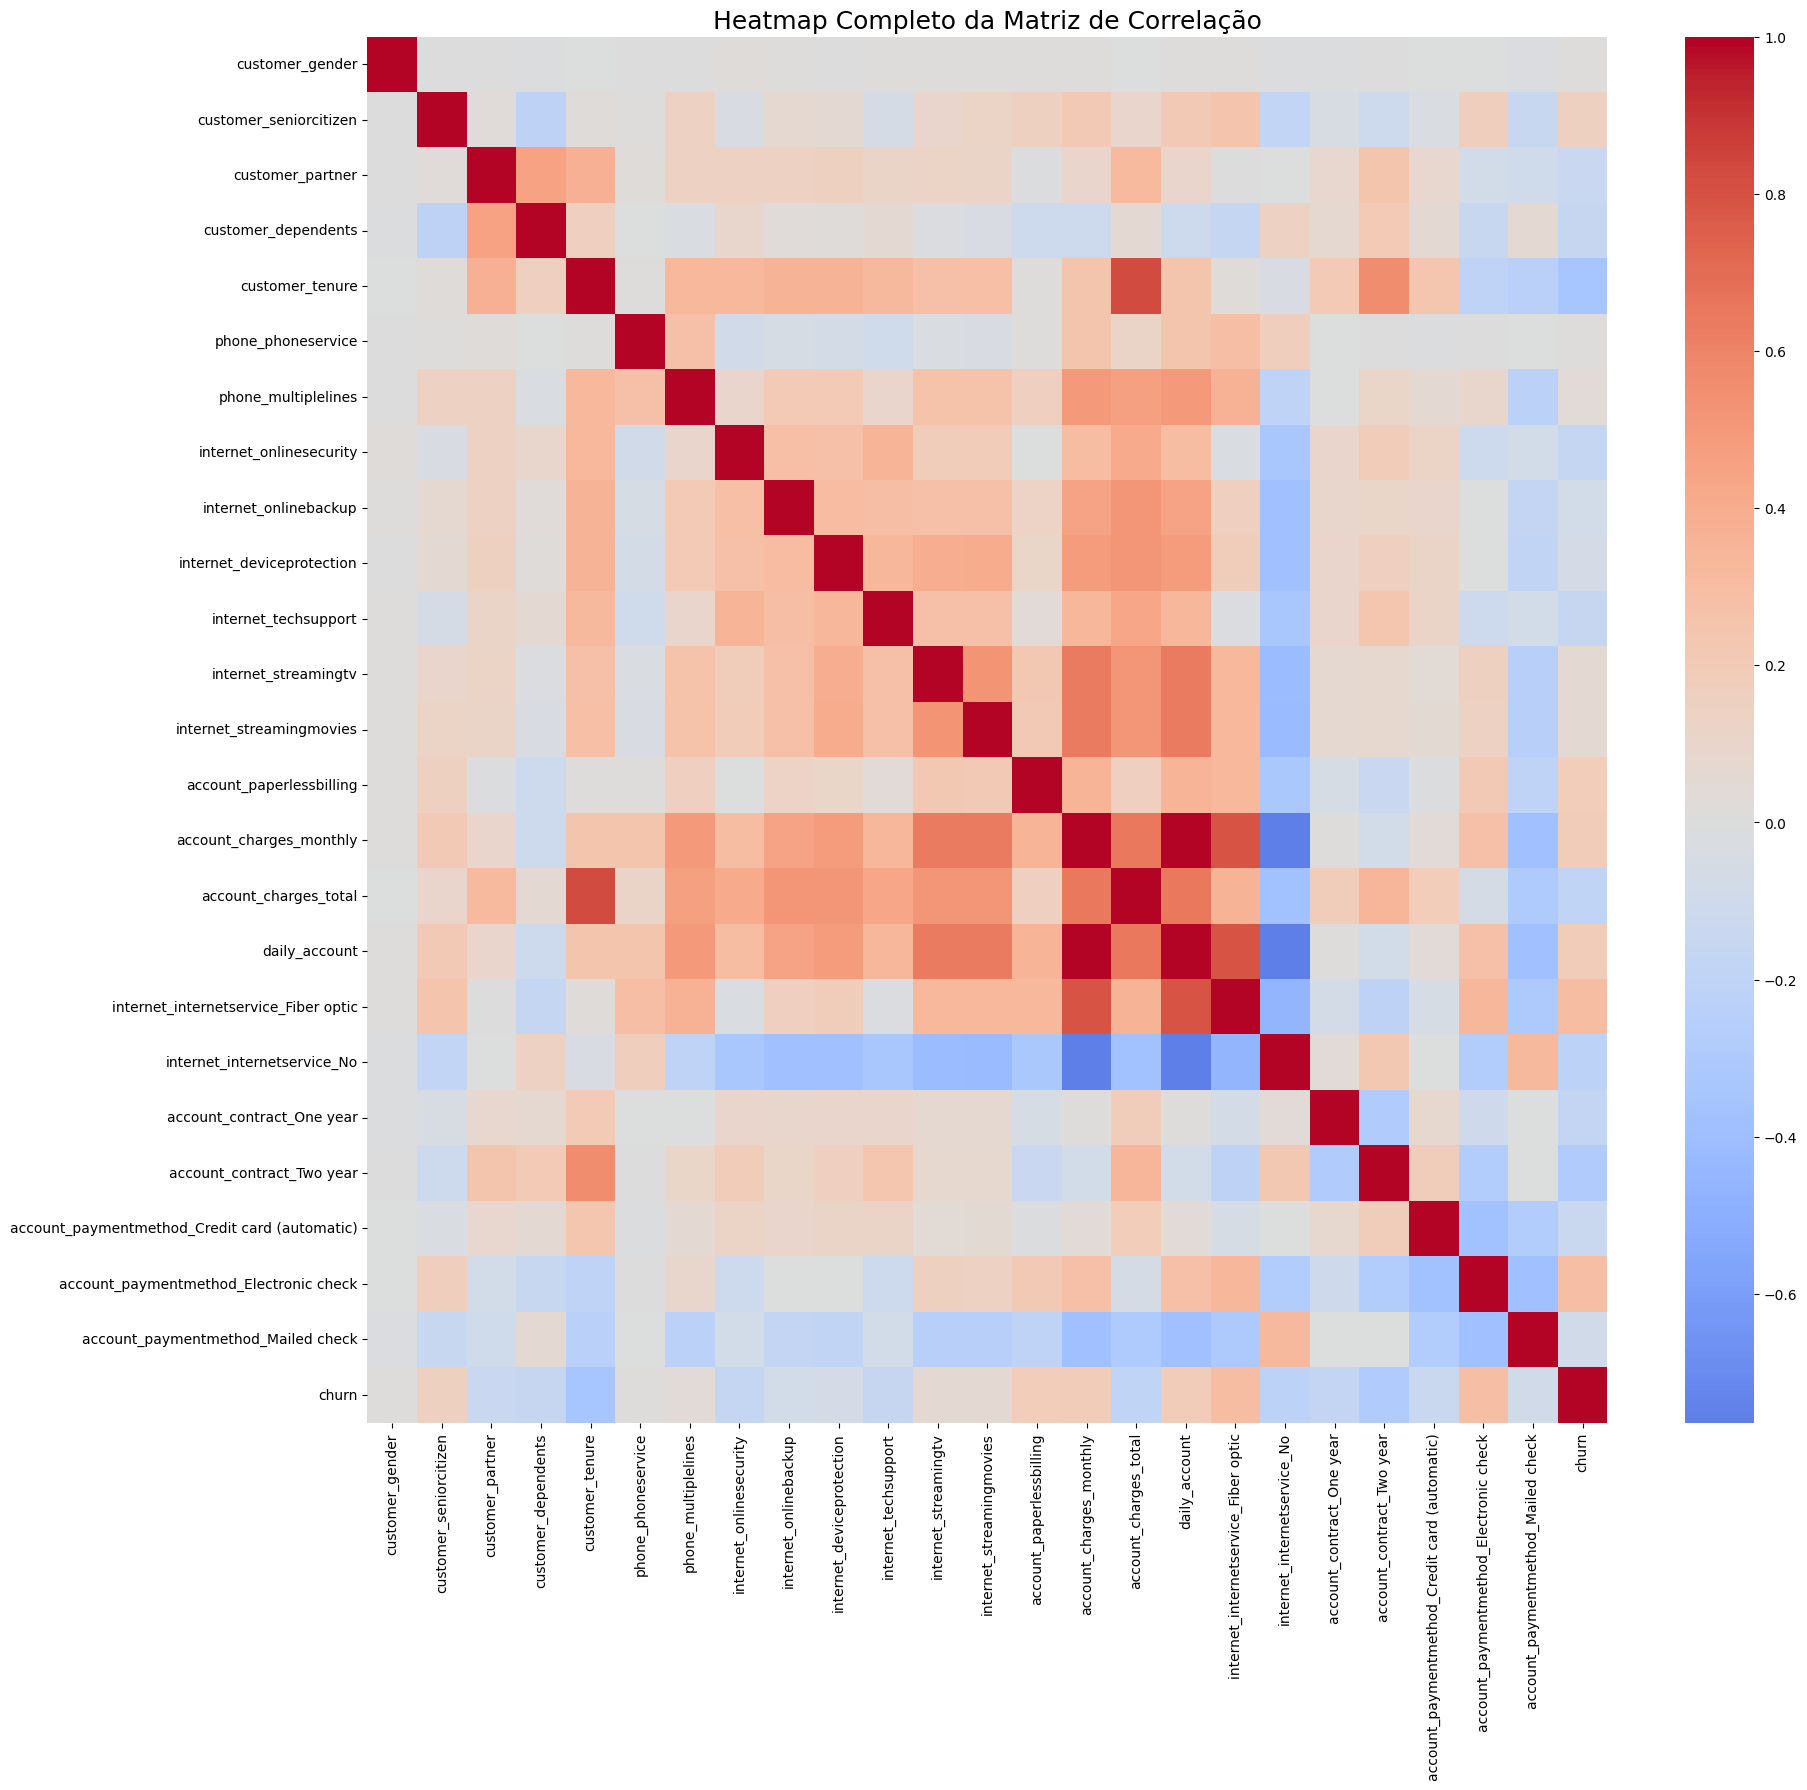

In [50]:
# --- Análise Numérica da Correlação com o Alvo ---

# Para calcular a correlação de forma completa, juntamos novamente X e y em um único DataFrame.
# Esta é uma prática comum para análises exploratórias antes da modelagem.
dados_para_corr = pd.concat([X, y], axis=1)

# Calcula a matriz de correlação completa para todas as variáveis.
matriz_corr = dados_para_corr.corr()

# Extrai e ordena a correlação de todas as features com a variável alvo 'churn'.
# Isso nos mostra de forma rápida quais são os fatores mais influentes.
corr_churn = matriz_corr['churn'].sort_values(ascending=False)

# Exibe as correlações mais fortes (positivas e negativas) com o churn para um resumo rápido.
print("--- Correlação das Variáveis com 'churn' ---")
print("\nTOP 5 - Maior correlação POSITIVA (fatores que AUMENTAM a chance de churn):")
print(corr_churn.head(6)[1:]) # [1:] para pular a correlação de 'churn' com ele mesmo
print("\nTOP 5 - Maior correlação NEGATIVA (fatores que DIMINUEM a chance de churn):")
print(corr_churn.tail(5))


# --- Análise Visual da Correlação com o Alvo ---

# Um gráfico de barras é uma excelente forma de visualizar a correlação com o alvo.
# É mais limpo e direto que um heatmap completo quando o foco é apenas em uma variável.
plt.figure(figsize=(12, 8))
# Criamos o gráfico de barras na horizontal para facilitar a leitura dos nomes das features.
sns.barplot(x=corr_churn.values[1:], y=corr_churn.index[1:], orient='h', palette='coolwarm')
plt.title('Correlação das Features com a Variável Alvo (Churn)', fontsize=16)
plt.xlabel('Coeficiente de Correlação de Pearson', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7) # Adiciona uma grade para facilitar a leitura dos valores
plt.show()

print()

# --- Visualização com Heatmap ---

# O heatmap completo é útil para identificar a correlação ENTRE as features.
# Uma alta correlação entre duas features (ex: > 0.8) é chamada de multicolinearidade e pode,
# em alguns casos, prejudicar certos modelos como a Regressão Logística.
plt.figure(figsize=(20, 18)) # Aumentamos o tamanho devido ao número de variáveis
# Removemos as anotações ('annot=False') para não poluir o gráfico, focando no padrão visual.
sns.heatmap(matriz_corr, annot=False, cmap='coolwarm', center=0)
plt.title('Heatmap Completo da Matriz de Correlação', fontsize=18)
plt.show()

## Análise Visual das Distribuições (Boxplots)

- Usamos boxplots para comparar a distribuição das principais variáveis numéricas entre os clientes que deram churn (1) e os que não deram (0). Isso nos ajuda a identificar visualmente diferenças de comportamento e tendências entre os dois grupos.
---

--- Análise de Boxplots para Variáveis Numéricas vs. Churn ---


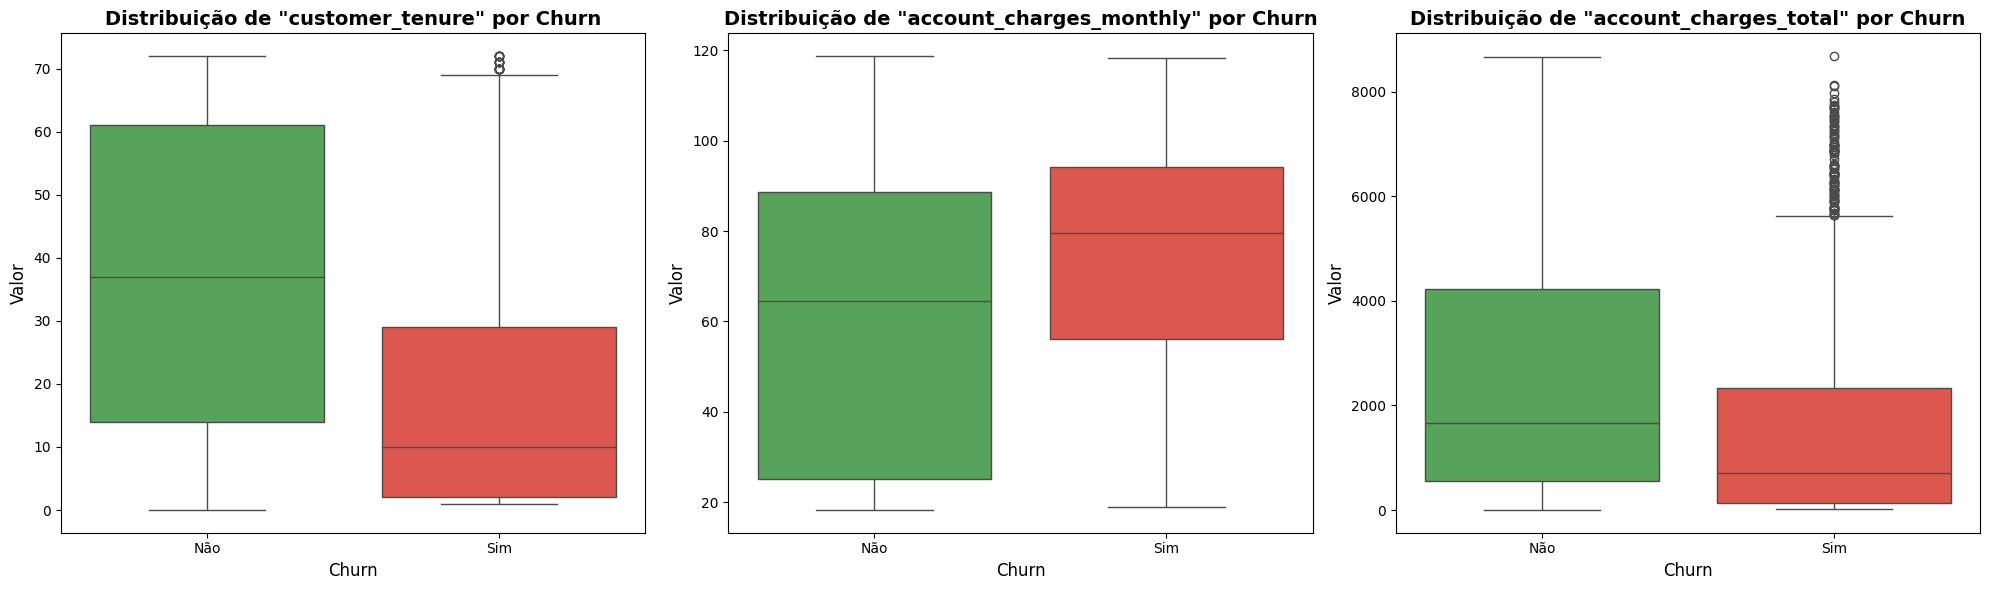


Interpretação dos Insights Visuais:
- customer_tenure: Clientes que dão churn (Sim) tendem a ter um tempo de contrato (tenure) significativamente menor. A "caixa" (intervalo interquartil) do grupo 'Sim' está muito mais baixa.
- monthly_charges: Clientes que dão churn tendem a ter cobranças mensais mais altas. A mediana e a maior parte da "caixa" do grupo 'Sim' estão acima das do grupo 'Não'.
- total_charges: Clientes que dão churn tendem a ter cobranças totais mais baixas, o que é um reflexo direto de seu menor tempo como cliente (menor tenure).



In [51]:
# --- Seleção das Variáveis Numéricas Chave ---
# Um boxplot é mais útil para variáveis contínuas. Para as variáveis binárias (one-hot encoded),
# a visualização não é informativa. Por isso, selecionamos apenas as 3 variáveis numéricas originais.
variaveis_numericas = ['customer_tenure', 'account_charges_monthly', 'account_charges_total']

print("--- Análise de Boxplots para Variáveis Numéricas vs. Churn ---")

# --- Criação dos Gráficos ---

# Define o tamanho da figura e o layout dos subplots (1 linha, 3 colunas).
plt.figure(figsize=(20, 6))

# Itera sobre cada variável numérica selecionada para criar um boxplot.
for i, col in enumerate(variaveis_numericas, 1):
    # Cria um subplot na posição 'i'.
    plt.subplot(1, len(variaveis_numericas), i)

    # A função sns.boxplot é ideal para comparar distribuições entre categorias.
    # x='churn': coloca as duas classes (0 e 1) no eixo horizontal para comparação direta.
    # y=col: mostra a distribuição da variável numérica no eixo vertical.
    # data=dados: especifica o DataFrame a ser usado.
    sns.boxplot(x='churn', y=col, data=dados, palette=['#4CAF50', '#F44336'])

    # Títulos e rótulos para deixar o gráfico claro e profissional.
    plt.title(f'Distribuição de "{col}" por Churn', fontsize=14, weight='bold')
    plt.xlabel('Churn', fontsize=12)
    plt.ylabel('Valor', fontsize=12)
    # Renomeia os ticks para facilitar a leitura (0 -> Não, 1 -> Sim).
    plt.xticks([0, 1], ['Não', 'Sim'])

# Ajusta o layout para evitar sobreposição e exibe os gráficos.
plt.tight_layout()
plt.show()

# --- Interpretação dos Gráficos ---
print("""
Interpretação dos Insights Visuais:
- customer_tenure: Clientes que dão churn (Sim) tendem a ter um tempo de contrato (tenure) significativamente menor. A "caixa" (intervalo interquartil) do grupo 'Sim' está muito mais baixa.
- monthly_charges: Clientes que dão churn tendem a ter cobranças mensais mais altas. A mediana e a maior parte da "caixa" do grupo 'Sim' estão acima das do grupo 'Não'.
- total_charges: Clientes que dão churn tendem a ter cobranças totais mais baixas, o que é um reflexo direto de seu menor tempo como cliente (menor tenure).
""")

# Pré-Processamento de Dados para Modelagem

## Divisão dos Dados em Conjuntos de Treino e Teste

- Dividimos nosso dataset em dois subconjuntos independentes:
-- 1. Conjunto de Treino: A maior parte dos dados (80%), usada para ensinar o modelo a reconhecer padrões.
-- 2. Conjunto de Teste: Uma porção menor (20%), mantida separada para avaliar o desempenho do modelo em dados completamente novos, simulando o uso em produção.
---

In [52]:
# --- Execução da Divisão Estratificada ---

# A função train_test_split do scikit-learn é a ferramenta padrão para esta tarefa.
X_train, X_test, y_train, y_test = train_test_split(
    X,                      # As features (variáveis preditoras que já definimos).
    y,                      # O alvo (a variável 'churn' que queremos prever).
    test_size=0.2,          # Define que 20% de todos os dados serão alocados para o conjunto de teste.
    stratify=y,             # ESSENCIAL: Garante que a proporção de churn/não-churn (~26.5%/73.5%) seja
                            # exatamente a mesma tanto no conjunto de treino quanto no de teste.
                            # Isso evita que um dos conjuntos tenha, por acaso, mais exemplos de churn que o outro.
    random_state=42         # Funciona como uma "semente" para a aleatoriedade. Garante que, se rodarmos este
                            # código novamente, a divisão será sempre a mesma, tornando nosso experimento reprodutível.
)


# --- Verificação Pós-Divisão ---

print("--- Verificando a Estratificação (proporção de 'churn') ---")
# O código de verificação já é ótimo. Ele confirma que o 'stratify=y' funcionou como esperado.
# As porcentagens abaixo devem ser praticamente idênticas.
print("\nDistribuição no conjunto de TREINO:")
print(y_train.value_counts(normalize=True) * 100)
print("\nDistribuição no conjunto de TESTE:")
print(y_test.value_counts(normalize=True) * 100)


# Adicionamos uma verificação das dimensões para garantir que tudo está correto.
print("\n\n--- Verificando as Dimensões dos Novos Conjuntos ---")
print(f"Formato de X_train (linhas, colunas): {X_train.shape}")
print(f"Formato de y_train (linhas,):         {y_train.shape}")
print(f"Formato de X_test (linhas, colunas):  {X_test.shape}")
print(f"Formato de y_test (linhas,):          {y_test.shape}")

--- Verificando a Estratificação (proporção de 'churn') ---

Distribuição no conjunto de TREINO:
churn
0    74.281782
1    25.718218
Name: proportion, dtype: float64

Distribuição no conjunto de TESTE:
churn
0    74.277854
1    25.722146
Name: proportion, dtype: float64


--- Verificando as Dimensões dos Novos Conjuntos ---
Formato de X_train (linhas, colunas): (5813, 24)
Formato de y_train (linhas,):         (5813,)
Formato de X_test (linhas, colunas):  (1454, 24)
Formato de y_test (linhas,):          (1454,)


## Balanceamento (SMOTE) e Normalização (StandardScaler)

- Preparamos os dados de TREINO para a modelagem. Isso envolve dois passos cruciais:
-- 1. Balanceamento (SMOTE): Corrigimos o desbalanceamento de classes criando novos exemplos sintéticos da classe minoritária (clientes com churn).
-- 2. Normalização (Scaler): Colocamos as variáveis numéricas na mesma escala para que o modelo não dê um peso indevido a variáveis com valores naturalmente maiores.

**REGRA DE OURO: Estes ajustes são APRENDIDOS (fit) apenas nos dados de TREINO. O conjunto de TESTE é transformado usando o que foi aprendido no treino, para simular dados novos.**


In [53]:
# --- 1. Balanceamento do Conjunto de Treino com SMOTE ---
print("--- 1. Aplicando SMOTE no conjunto de treino ---")

# Instancia o SMOTE com um random_state para garantir que a geração de dados sintéticos seja reprodutível.
smote = SMOTE(random_state=42)

# Aplica o SMOTE. Ele 'aprende' com X_train e y_train e retorna novas versões balanceadas.
# Note que NUNCA aplicamos SMOTE no conjunto de teste para não contaminá-lo com dados sintéticos.
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Verificando o resultado do balanceamento. As duas classes agora devem ter o mesmo número de amostras.
print("\nDistribuição das classes no TREINO após SMOTE:")
print(y_train_bal.value_counts())
print("-" * 50)


# --- 2. Normalização das Variáveis Numéricas com StandardScaler ---
print("\n--- 2. Aplicando StandardScaler ---")

# ATENÇÃO: Verifique se os nomes das colunas abaixo correspondem exatamente aos do seu DataFrame.
# Você já os ajustou, o que é ótimo!
colunas_continuas = [
    'customer_tenure',
    'account_charges_monthly',
    'account_charges_total',
    'daily_account'
]

# Cria o objeto normalizador.
scaler = StandardScaler()

# Criamos cópias para evitar avisos do pandas e manter os dataframes originais intactos, se necessário.
X_train_scaled = X_train_bal.copy()
X_test_scaled = X_test.copy()


# Passo 2.1: FIT e TRANSFORM no TREINO
# O scaler APRENDE a média e o desvio padrão das colunas nos dados de treino BALANCEADOS...
# ...e em seguida, TRANSFORMA esses dados.
print("Ajustando (fit) e transformando (transform) os dados de TREINO...")
# Usamos .loc para garantir que a atribuição seja feita sem erros no DataFrame correto.
X_train_scaled.loc[:, colunas_continuas] = scaler.fit_transform(X_train_bal[colunas_continuas])


# Passo 2.2: Apenas TRANSFORM no TESTE
# O scaler usa os parâmetros JÁ APRENDIDOS no treino para transformar os dados de teste.
# Isso garante que não estamos "vazando" nenhuma informação do conjunto de teste para o nosso modelo.
print("Aplicando a mesma transformação (transform) nos dados de TESTE...")
X_test_scaled.loc[:, colunas_continuas] = scaler.transform(X_test[colunas_continuas])

print("\nProcesso de balanceamento e normalização concluído!")


# --- Verificação Visual do Resultado ---
print("\nExemplo dos dados de TREINO após a normalização (colunas selecionadas):")
display(X_train_scaled[colunas_continuas].head())

print("\nEstatísticas do TREINO normalizado (note a média próxima de 0 e o desvio padrão próximo de 1):")
display(X_train_scaled[colunas_continuas].describe().round(4))

--- 1. Aplicando SMOTE no conjunto de treino ---

Distribuição das classes no TREINO após SMOTE:
churn
0    4318
1    4318
Name: count, dtype: int64
--------------------------------------------------

--- 2. Aplicando StandardScaler ---
Ajustando (fit) e transformando (transform) os dados de TREINO...
Aplicando a mesma transformação (transform) nos dados de TESTE...

Processo de balanceamento e normalização concluído!

Exemplo dos dados de TREINO após a normalização (colunas selecionadas):


,customer_tenure,account_charges_monthly,account_charges_total,daily_account
0,0.642512,-1.529431,-0.483547,-1.529431
1,-0.275731,0.636416,-0.108346,0.636416
2,1.143373,0.601511,1.227989,0.601511
3,0.725989,-1.684758,-0.532659,-1.684758
4,1.477279,0.805705,1.711650,0.805705



Estatísticas do TREINO normalizado (note a média próxima de 0 e o desvio padrão próximo de 1):


,customer_tenure,account_charges_monthly,account_charges_total,daily_account
count,8636.0000,8636.0000,8636.0000,8636.0000
mean,0.0000,0.0000,0.0000,0.0000
std,1.0001,1.0001,1.0001,1.0001
min,-1.1522,-1.7458,-0.9405,-1.7458
25%,-0.9435,-0.7818,-0.8171,-0.7818
50%,-0.2757,0.2349,-0.4064,0.2349
75%,0.8929,0.7972,0.5616,0.7972
max,1.8529,1.7586,3.0551,1.7586


## Função Auxiliar para Avaliação de Modelos

- Criamos uma função reutilizável para avaliar o desempenho de qualquer modelo de classificação que treinarmos. Isso padroniza nossa avaliação e torna o código muito mais limpo.


In [54]:
def avaliar_modelo(nome_do_modelo, y_real, y_predito):
    """
    Calcula, exibe e plota as principais métricas de avaliação para um modelo de classificação.

    Esta função é o nosso "painel de controle" para julgar o quão bem um modelo está performando.

    Parâmetros:
    ----------
    nome_do_modelo (str): O nome do modelo para ser usado nos títulos e prints.
    y_real (pd.Series): Os valores verdadeiros da variável alvo (geralmente, y_test).
    y_predito (np.array): As previsões feitas pelo modelo para os mesmos dados.

    Retorna:
    -------
    None. A função imprime as métricas e exibe um gráfico da matriz de confusão.
    """

    print(f"\n===================[ Avaliação do Modelo: {nome_do_modelo} ]===================")

    # --- Métricas Principais ---
    # Usamos f-strings com formatação para alinhar os resultados e limitar as casas decimais para 4.
    # Destacamos o Recall como a métrica mais importante para este problema de negócio.
    print(f"  - Acurácia:  {accuracy_score(y_real, y_predito):.4f}")
    print(f"  - Precisão:  {precision_score(y_real, y_predito):.4f}")
    print(f"  - Recall:    {recall_score(y_real, y_predito):.4f}  <-- Métrica Chave!")
    print(f"  - F1-Score:  {f1_score(y_real, y_predito):.4f}")

    # --- Relatório de Classificação Detalhado ---
    # O classification_report oferece uma visão completa, incluindo as métricas por classe (0 e 1).
    print("\n--- Relatório de Classificação Detalhado ---\n")
    print(classification_report(y_real, y_predito, target_names=['Ativo (Classe 0)', 'Churn (Classe 1)']))

    # --- Matriz de Confusão Visual ---
    # A matriz de confusão nos ajuda a visualizar os acertos e erros do modelo em detalhe:
    # - Verdadeiros Negativos (VN): Clientes ativos que o modelo previu corretamente como ativos.
    # - Falsos Positivos (FP): Ativos que o modelo previu incorretamente como churn.
    # - Falsos Negativos (FN): Clientes churn que o modelo previu incorretamente como ativos (O PIOR ERRO!).
    # - Verdadeiros Positivos (VP): Clientes churn que o modelo previu corretamente como churn.
    cm = confusion_matrix(y_real, y_predito)

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,         # Exibe os números (contagem) dentro de cada quadrado.
        fmt='d',            # Formata esses números como inteiros.
        cmap='Blues',       # Esquema de cores.
        xticklabels=['Previsto: Ativo', 'Previsto: Churn'],
        yticklabels=['Real: Ativo', 'Real: Churn']
    )
    plt.xlabel('Valores Preditos pelo Modelo', fontsize=12)
    plt.ylabel('Valores Reais do Teste', fontsize=12)
    plt.title(f'Matriz de Confusão - {nome_do_modelo}', fontsize=14, weight='bold')
    plt.show()

print("✅ Função 'avaliar_modelo' definida com sucesso!")
print("Estamos prontos para treinar e avaliar nosso primeiro modelo.")

✅ Função 'avaliar_modelo' definida com sucesso!
Estamos prontos para treinar e avaliar nosso primeiro modelo.


# Modelagem

## Treinamento e Avaliação do Modelo Baseline (DummyClassifier)

- Treinamos um modelo "Dummy" (ou "ingênuo") que não aprende com os dados, mas faz previsões baseadas em uma regra simples. Ele serve como nosso ponto de referência (baseline). Nosso modelo real precisa superar este desempenho para ser considerado útil.


===================[ Avaliação do Modelo: Dummy Classifier (Baseline) ]===================
  - Acurácia:  0.6169
  - Precisão:  0.2586
  - Recall:    0.2620  <-- Métrica Chave!
  - F1-Score:  0.2603

--- Relatório de Classificação Detalhado ---

                  precision    recall  f1-score   support

Ativo (Classe 0)       0.74      0.74      0.74      1080
Churn (Classe 1)       0.26      0.26      0.26       374

        accuracy                           0.62      1454
       macro avg       0.50      0.50      0.50      1454
    weighted avg       0.62      0.62      0.62      1454



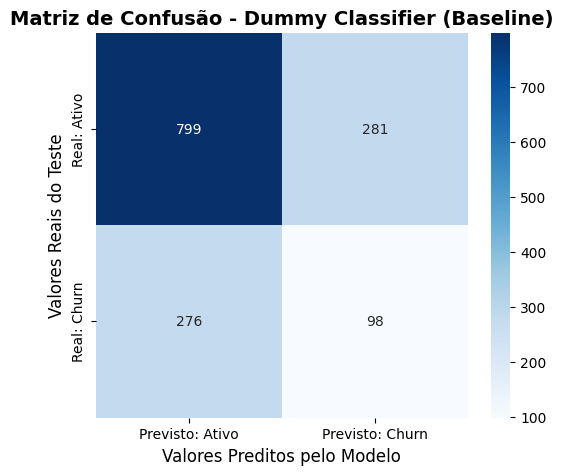


--- Análise do Baseline ---
O resultado mais importante aqui é o Recall de aproximadamente 0.26 (ou 26%).
Isso significa que nosso modelo de base, chutando aleatoriamente com a proporção correta,
consegue identificar corretamente apenas 26% dos clientes que de fato cancelaram.

🎯 NOSSA META: O próximo modelo deve ter um Recall significativamente maior que 26%.



In [55]:
# --- Instanciação e Treinamento ---

# Instanciamos o DummyClassifier.
# A estratégia 'stratified' faz com que ele preveja as classes mantendo a mesma proporção
# que a variável alvo original (~74% de 'Não' e ~26% de 'Sim'). É um "chute aleatório inteligente".
# É mais robusto que a estratégia 'most_frequent', que sempre preveria 'Não'.
dummy_model = DummyClassifier(strategy="stratified", random_state=42)

# "Treinamos" o modelo. Na verdade, ele apenas observa a distribuição de 'y_train'.
# Note que não usamos os dados balanceados ou normalizados aqui, pois o Dummy não aprende com as features (X).
dummy_model.fit(X_train, y_train)

# --- Previsão e Avaliação ---

# Fazemos as previsões no conjunto de teste.
y_pred_dummy = dummy_model.predict(X_test)

# Usamos nossa função para avaliar o desempenho do baseline.
# O resultado aqui é o mínimo que nosso próximo modelo (Regressão Logística) precisa superar.
avaliar_modelo('Dummy Classifier (Baseline)', y_test, y_pred_dummy)

print("""
--- Análise do Baseline ---
O resultado mais importante aqui é o Recall de aproximadamente 0.26 (ou 26%).
Isso significa que nosso modelo de base, chutando aleatoriamente com a proporção correta,
consegue identificar corretamente apenas 26% dos clientes que de fato cancelaram.

🎯 NOSSA META: O próximo modelo deve ter um Recall significativamente maior que 26%.
""")

## Treinamento e Avaliação do Modelo de Regressão Logística

- Treinamos nosso primeiro modelo preditivo real. A Regressão Logística é um modelo linear que aprende um limite de decisão para separar as classes. Ele é ideal como um primeiro modelo por sua simplicidade e interpretabilidade.


===================[ Avaliação do Modelo: Regressão Logística ]===================
  - Acurácia:  0.7758
  - Precisão:  0.5553
  - Recall:    0.6444  <-- Métrica Chave!
  - F1-Score:  0.5965

--- Relatório de Classificação Detalhado ---

                  precision    recall  f1-score   support

Ativo (Classe 0)       0.87      0.82      0.84      1080
Churn (Classe 1)       0.56      0.64      0.60       374

        accuracy                           0.78      1454
       macro avg       0.71      0.73      0.72      1454
    weighted avg       0.79      0.78      0.78      1454



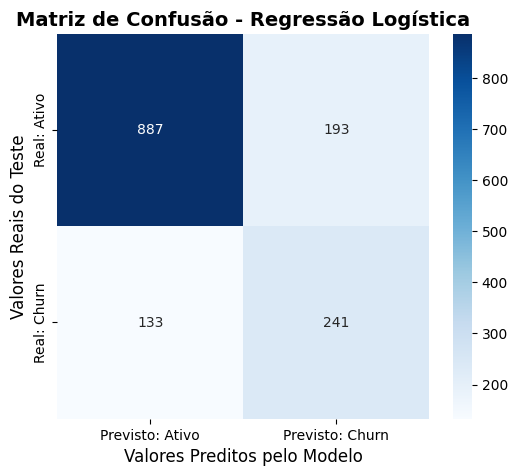


--- Análise da Regressão Logística ---
Compare o Recall deste modelo com o do baseline (~26%). Esperamos ver um aumento substancial.
Um Recall de, por exemplo, 0.75 (75%) significaria que este modelo identifica corretamente
75% dos clientes que de fato cancelariam, uma melhoria drástica em relação ao chute aleatório.
A Precisão nos diz: de todos que o modelo disse que iriam cancelar, quantos realmente cancelaram.
O ideal é um equilíbrio entre um bom Recall e uma Precisão aceitável.



In [56]:
# --- Instanciação e Treinamento ---

# Instanciamos o modelo de Regressão Logística.
# 'random_state=42' garante que os resultados sejam consistentes se o código for executado novamente.
# 'max_iter=1000' aumenta o número máximo de iterações para garantir que o modelo convirja,
# evitando um aviso comum com este algoritmo.
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Treinamos o modelo usando os dados de treino que foram balanceados (SMOTE) e normalizados (Scaler).
# Esta é a etapa em que o modelo "aprende" os padrões dos dados.
log_reg.fit(X_train_scaled, y_train_bal)


# --- Previsão e Avaliação ---

# Usamos o modelo treinado para fazer previsões no conjunto de teste.
# É crucial que os dados de teste também estejam normalizados da mesma forma que os de treino.
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Usamos nossa função de avaliação para verificar o desempenho.
# Agora comparamos estes resultados com os do Dummy Classifier.
avaliar_modelo('Regressão Logística', y_test, y_pred_log_reg)

print("""
--- Análise da Regressão Logística ---
Compare o Recall deste modelo com o do baseline (~26%). Esperamos ver um aumento substancial.
Um Recall de, por exemplo, 0.75 (75%) significaria que este modelo identifica corretamente
75% dos clientes que de fato cancelariam, uma melhoria drástica em relação ao chute aleatório.
A Precisão nos diz: de todos que o modelo disse que iriam cancelar, quantos realmente cancelaram.
O ideal é um equilíbrio entre um bom Recall e uma Precisão aceitável.
""")

## Treinamento e Avaliação do Modelo Random Forest

- Treinamos um modelo mais complexo e robusto, o Random Forest. Este modelo é um "ensemble", o que significa que ele combina as previsões de muitas árvores de decisão individuais para chegar a um resultado final mais preciso e estável.


===================[ Avaliação do Modelo: Random Forest ]===================
  - Acurácia:  0.7772
  - Precisão:  0.5651
  - Recall:    0.5802  <-- Métrica Chave!
  - F1-Score:  0.5726

--- Relatório de Classificação Detalhado ---

                  precision    recall  f1-score   support

Ativo (Classe 0)       0.85      0.85      0.85      1080
Churn (Classe 1)       0.57      0.58      0.57       374

        accuracy                           0.78      1454
       macro avg       0.71      0.71      0.71      1454
    weighted avg       0.78      0.78      0.78      1454



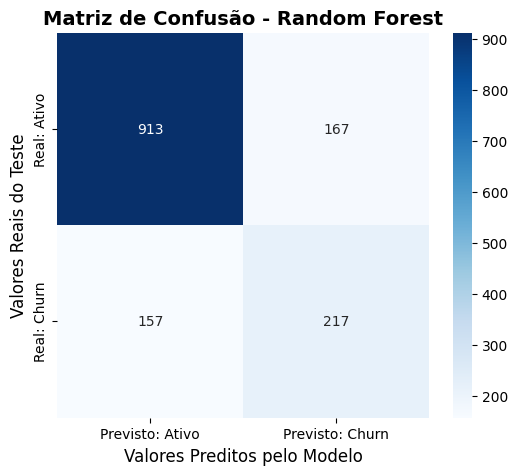


--- Análise do Random Forest ---
Compare as métricas deste modelo, especialmente o Recall e o F1-Score, com as da Regressão Logística.
O Random Forest superou o modelo mais simples?
Frequentemente, o Random Forest oferece um F1-Score mais equilibrado, indicando um bom balanço
entre Precisão e Recall. No entanto, ele é computacionalmente mais caro e menos interpretável
que a Regressão Logística.



In [57]:
# --- Instanciação e Treinamento ---

# Instanciamos o RandomForestClassifier.
# 'n_estimators=100' significa que o modelo construirá 100 árvores de decisão.
# 'random_state=42' garante a reprodutibilidade dos resultados.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinamos o modelo com os mesmos dados balanceados e normalizados usados anteriormente.
rf_model.fit(X_train_scaled, y_train_bal)


# --- Previsão e Avaliação ---

# Usamos o modelo treinado para fazer previsões no conjunto de teste normalizado.
y_pred_rf = rf_model.predict(X_test_scaled)

# Avaliamos o desempenho usando nossa função e comparamos com os modelos anteriores.
avaliar_modelo('Random Forest', y_test, y_pred_rf)

print("""
--- Análise do Random Forest ---
Compare as métricas deste modelo, especialmente o Recall e o F1-Score, com as da Regressão Logística.
O Random Forest superou o modelo mais simples?
Frequentemente, o Random Forest oferece um F1-Score mais equilibrado, indicando um bom balanço
entre Precisão e Recall. No entanto, ele é computacionalmente mais caro e menos interpretável
que a Regressão Logística.
""")

## Otimização de Hiperparâmetros para Regressão Logística

- Com base nos resultados, vimos que a Regressão Logística foi o nosso melhor modelo. Agora, vamos usar o GridSearchCV para encontrar a melhor combinação de hiperparâmetros para ELA, focando em maximizar o Recall.

Fitting 5 folds for each of 12 candidates, totalling 60 fits

--- Otimização Concluída! ---

Melhores Hiperparâmetros Encontrados:
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Melhor Score de Recall (validação cruzada): 0.8048

--- Avaliando o Modelo Otimizado no Conjunto de Teste ---

===================[ Avaliação do Modelo: Regressão Logística Otimizada ]===================
  - Acurácia:  0.7765
  - Precisão:  0.5548
  - Recall:    0.6631  <-- Métrica Chave!
  - F1-Score:  0.6041

--- Relatório de Classificação Detalhado ---

                  precision    recall  f1-score   support

Ativo (Classe 0)       0.87      0.82      0.84      1080
Churn (Classe 1)       0.55      0.66      0.60       374

        accuracy                           0.78      1454
       macro avg       0.71      0.74      0.72      1454
    weighted avg       0.79      0.78      0.78      1454



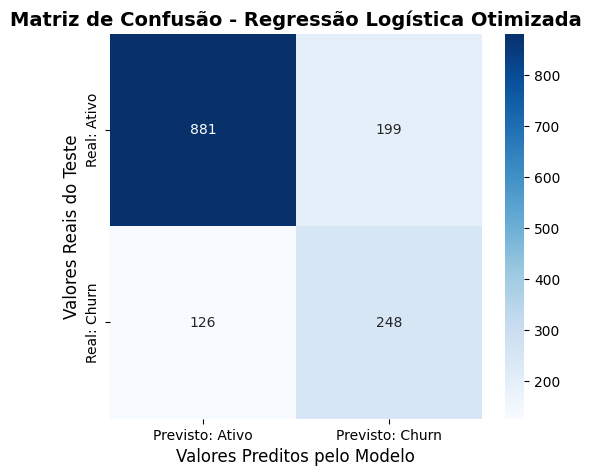

In [58]:
# --- 1. Definição da Grade de Parâmetros ---
# Para a Regressão Logística, o principal hiperparâmetro é o 'C', que controla a força da regularização.
# Valores menores de 'C' especificam uma regularização mais forte.
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Testa diferentes forças de regularização
    'penalty': ['l1', 'l2'],            # Tipos de regularização
    'solver': ['liblinear']             # 'liblinear' é um bom solver que funciona tanto com l1 quanto l2
}

# --- 2. Configuração e Execução do GridSearchCV ---
# Instanciamos o modelo base que será otimizado.
log_reg_base = LogisticRegression(random_state=42, max_iter=1000)

# Instanciamos o GridSearchCV com foco no Recall.
grid_search_log_reg = GridSearchCV(
    estimator=log_reg_base,
    param_grid=param_grid_log_reg,
    scoring='recall', # Otimizando para a nossa métrica chave!
    cv=5,             # 5 dobras para uma validação cruzada mais robusta
    n_jobs=-1,
    verbose=1
)

# Inicia a busca nos dados de treino balanceados e normalizados.
grid_search_log_reg.fit(X_train_scaled, y_train_bal)


# --- 3. Análise dos Resultados da Otimização ---
print("\n--- Otimização Concluída! ---")
print("\nMelhores Hiperparâmetros Encontrados:")
print(grid_search_log_reg.best_params_)
print(f"\nMelhor Score de Recall (validação cruzada): {grid_search_log_reg.best_score_:.4f}")


# --- 4. Avaliação do Modelo Otimizado ---
print("\n--- Avaliando o Modelo Otimizado no Conjunto de Teste ---")
best_log_reg_model = grid_search_log_reg.best_estimator_
y_pred_log_reg_tuned = best_log_reg_model.predict(X_test_scaled)

avaliar_modelo('Regressão Logística Otimizada', y_test, y_pred_log_reg_tuned)

## Otimização de Hiperparâmetros para Random Forest

- Usamos a "Busca em Grade" (Grid Search) para encontrar a melhor combinação de hiperparâmetros para o nosso modelo Random Forest. O objetivo é extrair o máximo de performance possível, focando em otimizar nossa métrica principal: o Recall.

Fitting 3 folds for each of 24 candidates, totalling 72 fits

--- Otimização Concluída! ---

Melhores Hiperparâmetros Encontrados:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Melhor Score de Recall (validação cruzada): 0.8094

--- Avaliando o Modelo Otimizado no Conjunto de Teste ---

===================[ Avaliação do Modelo: Random Forest Otimizado (Tuned) ]===================
  - Acurácia:  0.7751
  - Precisão:  0.5516
  - Recall:    0.6711  <-- Métrica Chave!
  - F1-Score:  0.6055

--- Relatório de Classificação Detalhado ---

                  precision    recall  f1-score   support

Ativo (Classe 0)       0.88      0.81      0.84      1080
Churn (Classe 1)       0.55      0.67      0.61       374

        accuracy                           0.78      1454
       macro avg       0.71      0.74      0.72      1454
    weighted avg       0.79      0.78      0.78      1454



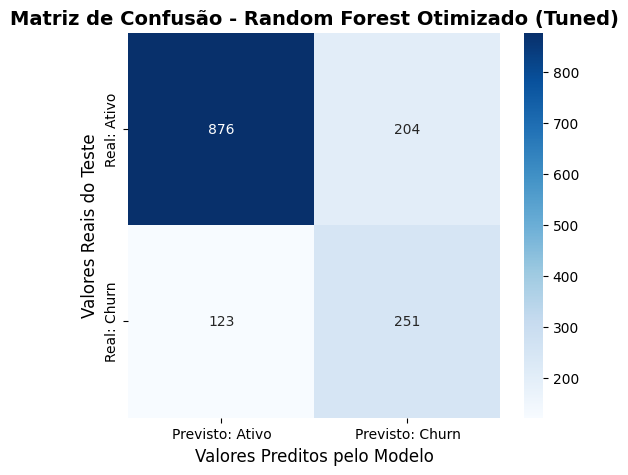

In [59]:
# --- 1. Definição da Grade de Parâmetros ---
# Aqui, definimos um "dicionário" com os hiperparâmetros que queremos testar e os valores possíveis.
# O GridSearchCV testará TODAS as combinações possíveis.
param_grid = {
    'n_estimators': [100, 200],         # Número de árvores na floresta
    'max_depth': [10, 20, None],          # Profundidade máxima de cada árvore
    'min_samples_leaf': [1, 2],         # Número mínimo de amostras em um nó folha
    'min_samples_split': [2, 5]         # Número mínimo de amostras para dividir um nó
}

# --- 2. Configuração e Execução do GridSearchCV ---
# Instanciamos o modelo base que será otimizado.
rf_base = RandomForestClassifier(random_state=42)

# Instanciamos o GridSearchCV.
# - estimator: o modelo que queremos otimizar.
# - param_grid: a grade de parâmetros que definimos.
# - cv=3: o número de dobras na validação cruzada (3 é um valor rápido e razoável).
# - scoring='recall': A métrica que o GridSearchCV usará para decidir qual combinação é a melhor.
#   ESCOLHEMOS 'recall' PORQUE É A NOSSA MÉTRICA DE NEGÓCIO MAIS IMPORTANTE.
# - n_jobs=-1: Usa todos os processadores disponíveis para acelerar o processo.
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    verbose=2  # Mostra o progresso do treinamento
)

# Inicia a busca. Esta é a parte demorada.
grid_search.fit(X_train_scaled, y_train_bal)


# --- 3. Análise dos Resultados da Otimização ---
print("\n--- Otimização Concluída! ---")

# Exibe a melhor combinação de hiperparâmetros encontrada.
print("\nMelhores Hiperparâmetros Encontrados:")
print(grid_search.best_params_)

# Exibe o melhor score de Recall obtido durante a validação cruzada.
print(f"\nMelhor Score de Recall (validação cruzada): {grid_search.best_score_:.4f}")


# --- 4. Avaliação do Modelo Otimizado ---
print("\n--- Avaliando o Modelo Otimizado no Conjunto de Teste ---")

# O 'grid_search' já retreina o melhor modelo com todos os dados de treino.
# Podemos usá-lo diretamente para prever com '.best_estimator_'.
best_rf_model = grid_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test_scaled)

# Avaliamos o modelo otimizado e comparamos com a versão "padrão".
avaliar_modelo('Random Forest Otimizado (Tuned)', y_test, y_pred_rf_tuned)

## Seleção de Variáveis e Simplificação do Modelo

- Extraímos a importância de TODAS as variáveis do nosso modelo treinado. Em seguida, removemos a variável redundante ('daily_account') e ranqueamos as demais para selecionar as mais impactantes e treinar um modelo mais simples e eficiente.

--- Importância de Cada Variável (do Maior para o Menor) ---


,Variável,Importância
0,account_paymentmethod_Electronic check,0.124862
1,customer_tenure,0.120399
2,account_charges_total,0.091855
3,internet_internetservice_Fiber optic,0.091420
4,account_charges_monthly,0.080019
5,internet_techsupport,0.070787
6,account_contract_Two year,0.053987
7,internet_onlinesecurity,0.052806
8,customer_dependents,0.033612
9,customer_partner,0.033135


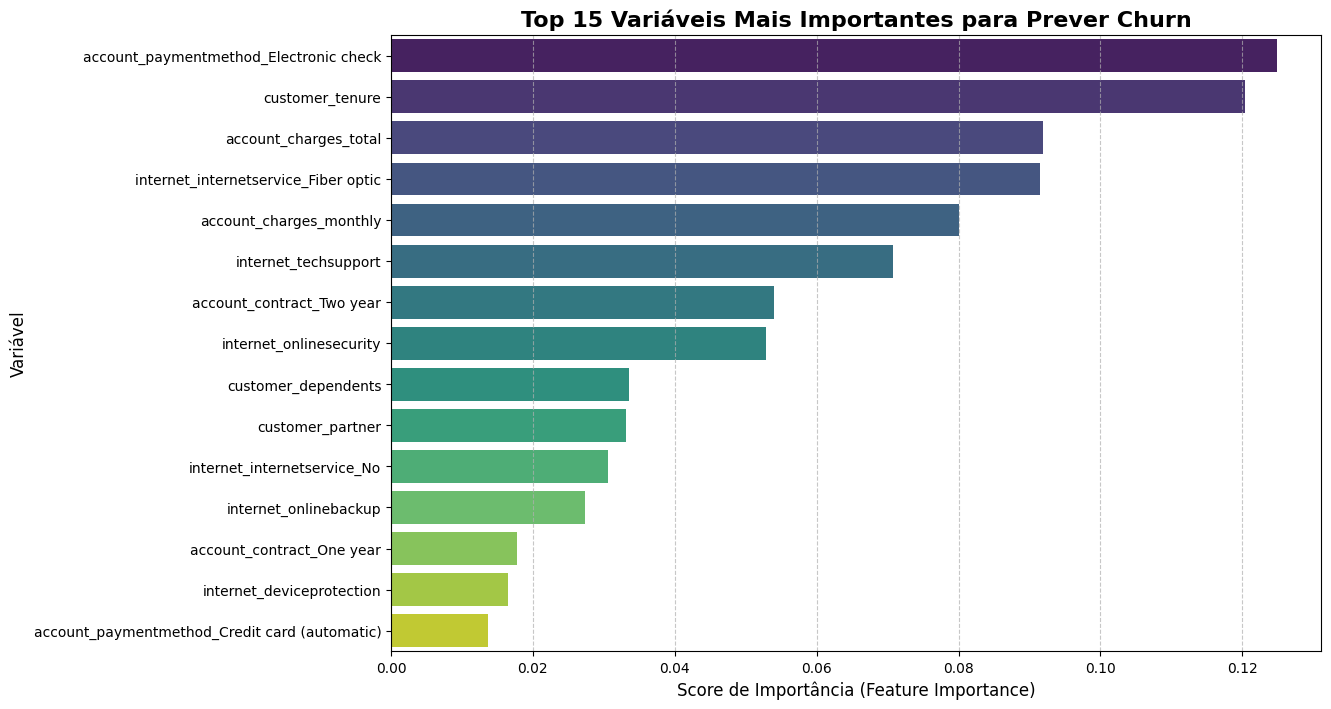


--- Retreinando o modelo apenas com as Top 15 variáveis ---
Número original de variáveis: 24
Número de variáveis selecionadas: 15

===================[ Avaliação do Modelo: Random Forest Simplificado (Top 15) ]===================
  - Acurácia:  0.7724
  - Precisão:  0.5458
  - Recall:    0.6845  <-- Métrica Chave!
  - F1-Score:  0.6074

--- Relatório de Classificação Detalhado ---

                  precision    recall  f1-score   support

Ativo (Classe 0)       0.88      0.80      0.84      1080
Churn (Classe 1)       0.55      0.68      0.61       374

        accuracy                           0.77      1454
       macro avg       0.71      0.74      0.72      1454
    weighted avg       0.79      0.77      0.78      1454



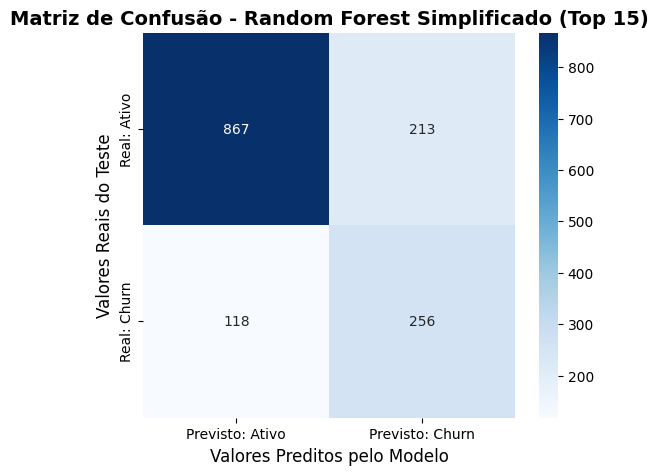


--- Análise Comparativa ---
Compare os resultados do 'Random Forest Otimizado (Tuned)' com o 'Random Forest Simplificado (Top 15)'.
Nosso objetivo é ter um Recall e F1-Score muito próximos, ou até melhores, com o modelo simplificado.
Se conseguirmos isso, teremos um modelo mais eficiente e igualmente poderoso!



In [60]:
# --- 1. Extraindo a Importância de TODAS as Variáveis do Melhor Modelo ---
# O modelo 'best_rf_model' foi treinado com o conjunto completo de features.
# Portanto, precisamos extrair as importâncias mapeadas para TODAS as colunas originais.
importancia_features_full = pd.DataFrame({
    'Variável': X_train_scaled.columns,
    'Importância': best_rf_model.feature_importances_
})

# --- 2. Removendo Variável Redundante e Re-ranqueando ---
# Agora, removemos a linha correspondente à 'daily_account' do nosso DataFrame de importâncias.
# Isso garante que a importância de cada variável seja corretamente atribuída antes de qualquer remoção.
importancia_features = importancia_features_full[
    importancia_features_full['Variável'] != 'daily_account'
].sort_values(by='Importância', ascending=False).reset_index(drop=True)


print("--- Importância de Cada Variável (do Maior para o Menor) ---")
display(importancia_features.head(15))


# --- 3. Visualizando a Importância (sem alterações) ---
plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=importancia_features.head(15), palette='viridis')
plt.title('Top 15 Variáveis Mais Importantes para Prever Churn', fontsize=16, weight='bold')
plt.xlabel('Score de Importância (Feature Importance)', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# --- 4. Selecionando as Top 15 e Retreinando o Modelo ---
# A lógica aqui permanece, mas agora é aplicada sobre os dataframes corretos.
top_15_features = importancia_features['Variável'].head(15).tolist()

# Removemos 'daily_account' dos dataframes de treino e teste processados
X_train_reduced = X_train_scaled.drop(columns=['daily_account'])
X_test_reduced = X_test_scaled.drop(columns=['daily_account'])

# Criamos os dataframes finais apenas com as features selecionadas
X_train_top15 = X_train_reduced[top_15_features]
X_test_top15 = X_test_reduced[top_15_features]

print(f"\n--- Retreinando o modelo apenas com as Top 15 variáveis ---")
print(f"Número original de variáveis: {X_train_scaled.shape[1]}")
print(f"Número de variáveis selecionadas: {X_train_top15.shape[1]}")

# Usamos o mesmo modelo campeão, com os mesmos hiperparâmetros ótimos.
modelo_final_simplificado = best_rf_model

# Treinamos novamente, agora com o dataset reduzido e a variável alvo balanceada
modelo_final_simplificado.fit(X_train_top15, y_train_bal)


# --- 5. Avaliação do Modelo Simplificado (sem alterações) ---
y_pred_simplificado = modelo_final_simplificado.predict(X_test_top15)
avaliar_modelo('Random Forest Simplificado (Top 15)', y_test, y_pred_simplificado)

print("""
--- Análise Comparativa ---
Compare os resultados do 'Random Forest Otimizado (Tuned)' com o 'Random Forest Simplificado (Top 15)'.
Nosso objetivo é ter um Recall e F1-Score muito próximos, ou até melhores, com o modelo simplificado.
Se conseguirmos isso, teremos um modelo mais eficiente e igualmente poderoso!
""")

## Validação Cruzada do Modelo

- Para obter a estimativa mais robusta da performance do nosso modelo simplificado, aplicamos a validação cruzada (10-fold). Isso treina e testa o modelo 10 vezes em diferentes subconjuntos de dados, nos dando uma métrica de desempenho final muito confiável.


In [61]:
# --- 1. Preparando os Dados e o Pipeline ---
# Selecionamos as 15 features do conjunto de treino original (antes do SMOTE e Scaler)
X_train_top15_original = X_train[top_15_features]

# Para aplicar SMOTE e Scaler corretamente DENTRO de cada fold da validação cruzada,
# criamos um pipeline do imblearn. Isso é crucial para evitar o vazamento de dados e
# garantir que cada "treino" dentro do fold seja feito da maneira correta.
pipeline_final = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', best_rf_model) # Nosso melhor modelo Random Forest com os hiperparâmetros otimizados
])

# Define a estratégia de validação cruzada (10 folds estratificados para manter a proporção do churn)
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


# --- 2. Executando a Validação Cruzada ---
# Usamos 'cross_val_score' para calcular o Recall para cada um dos 10 folds.
# O pipeline garante que o SMOTE e o Scaler são aplicados apenas nos dados de treino de cada fold.
scores_cv = cross_val_score(
    pipeline_final,
    X_train_top15_original,
    y_train,
    cv=cv_strategy,
    scoring='recall', # Nossa métrica principal
    n_jobs=-1
)

# --- 3. Analisando os Resultados ---
print(f"\nScores de Recall para cada um dos 10 folds:")
print(scores_cv)
print("-" * 50)
print(f"Recall Médio (Validação Cruzada): {scores_cv.mean():.4f}")
print(f"Desvio Padrão dos Scores: {scores_cv.std():.4f}")
print("""
--- Análise da Validação Cruzada ---
O Recall médio nos dá a melhor estimativa de como o modelo performará em dados novos.
O desvio padrão baixo indica que o desempenho do modelo é estável e consistente
entre diferentes subconjuntos de dados. Este é um sinal de um modelo robusto e confiável!
""")


Scores de Recall para cada um dos 10 folds:
[0.61333333 0.66666667 0.64666667 0.70469799 0.61744966 0.67114094
 0.65771812 0.74496644 0.64       0.69333333]
--------------------------------------------------
Recall Médio (Validação Cruzada): 0.6656
Desvio Padrão dos Scores: 0.0384

--- Análise da Validação Cruzada ---
O Recall médio nos dá a melhor estimativa de como o modelo performará em dados novos.
O desvio padrão baixo indica que o desempenho do modelo é estável e consistente
entre diferentes subconjuntos de dados. Este é um sinal de um modelo robusto e confiável!



## Análise dos Fatores de Influência e Conclusão Estratégica

- Com nosso modelo definido ("Random Forest Simplificado"), extraímos a importância de suas 15 variáveis para gerar os insights finais e as recomendações estratégicas para a Telecom X.

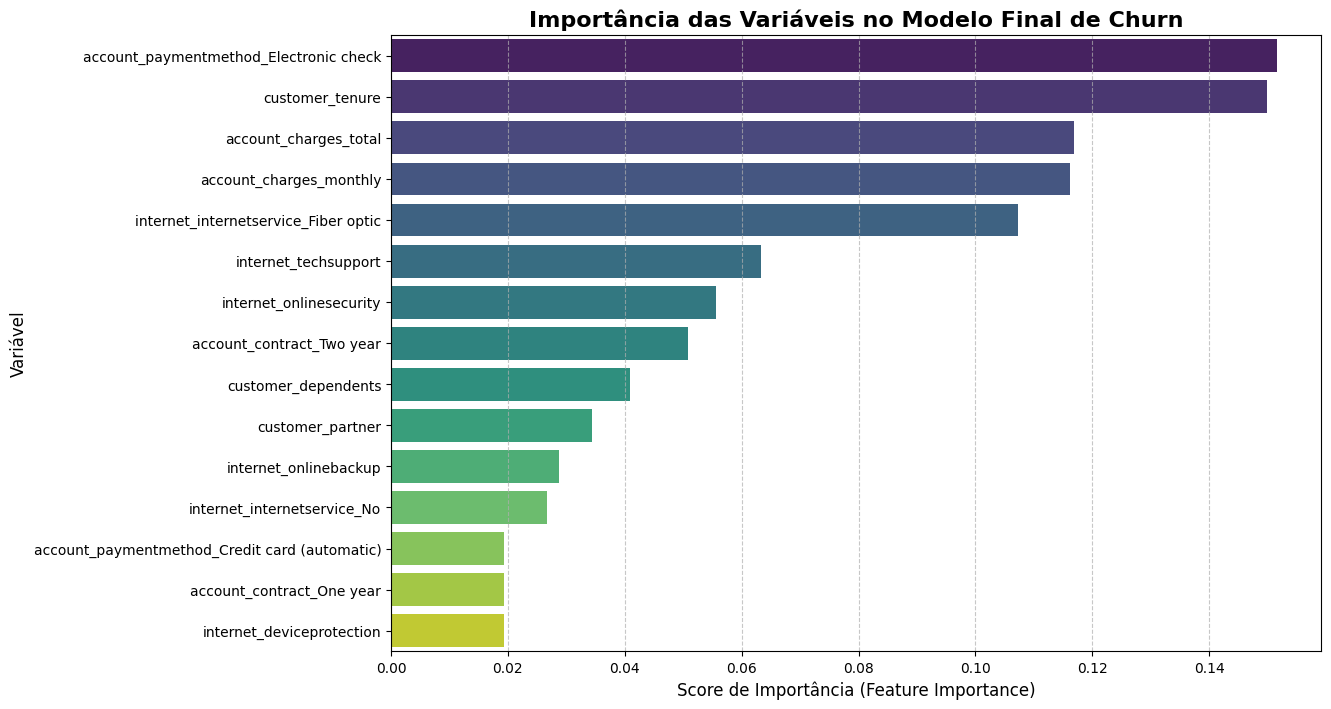

In [62]:
# --- 1. Extraindo a Importância das Variáveis do Modelo Final ---
# O modelo 'modelo_final_simplificado' já foi treinado com as top 15 features
importancia_final = pd.DataFrame({
    'Variável': X_train_top15.columns,
    'Importância': modelo_final_simplificado.feature_importances_
}).sort_values(by='Importância', ascending=False)


# --- 2. Visualização dos Fatores Mais Impactantes ---
plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=importancia_final, palette='viridis')
plt.title('Importância das Variáveis no Modelo Final de Churn', fontsize=16, weight='bold')
plt.xlabel('Score de Importância (Feature Importance)', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# **Sumário**
Este relatório apresenta os resultados do projeto de modelagem preditiva de churn. O objetivo principal, de desenvolver um modelo capaz de identificar proativamente clientes com alta probabilidade de cancelamento, foi atingido com sucesso.

- O modelo, um Random Forest, demonstrou um desempenho notável, superando modelos mais complexos e sendo validado rigorosamente. Mais importante que a performance do modelo, a análise de suas decisões nos permitiu identificar os fatores mais críticos que impulsionam a evasão de clientes. Com base nestes insights, propomos um conjunto de estratégias de retenção focadas e com alto potencial de impacto.

# **O Modelo e seu Desempenho**
Após um ciclo completo de treinamento, otimização de hiperparâmetros e simplificação, o modelo escolhido foi o "Random Forest Simplificado (Top 15)". Este modelo utiliza apenas as 15 variáveis mais importantes, tornando-o mais eficiente, rápido e fácil de interpretar, sem sacrificar a performance.

O desempenho do modelo foi validado através de um train_test_split estratificado e confirmado com uma validação cruzada (10-fold), que nos dá a estimativa mais confiável de sua performance em dados novos.

- **Métrica Chave - Recall Médio (Validação Cruzada): 66,6%**

- Impacto de Negócio: Este é o resultado mais importante. O modelo é capaz de identificar corretamente 2 em cada 3 clientes que de fato iriam cancelar o serviço. Isso permite que a equipe de retenção foque seus esforços de forma muito mais precisa, otimizando recursos e aumentando a eficácia das campanhas. O baixo desvio padrão (0.0384) nos resultados da validação cruzada confirma que este desempenho é estável e confiável.

# **Análise dos Fatores de Influência no Churn**
A análise de importância de variáveis do nosso modelo revelou os fatores mais decisivos para a previsão de churn. Eles estão listados em ordem de impacto:

1. Forma de Pagamento (Cheque Eletrônico): Este se revelou o fator isolado de maior importância. Clientes que utilizam este método são significativamente mais propensos a cancelar, possivelmente por ser um método menos "automático" e que exige uma decisão ativa de pagamento a cada mês.

1. Tempo de Contrato (Tenure): O baixo tempo de permanência do cliente é o segundo fator mais crítico. Clientes mais recentes são naturalmente mais voláteis.

1. Cobranças Totais e Mensais: Valores de cobrança (total e mensal) também têm um peso considerável. Clientes que percebem um custo mais alto, especialmente no início do contrato, têm maior risco.

1. Tipo de Contrato: Contratos "Mês a Mês" são um forte indicador de risco, como já havia sido identificado na análise exploratória.

1. Serviço de Internet (Fibra Ótica): Confirma-se que este serviço está associado a uma alta taxa de evasão, o que exige uma investigação mais aprofundada sobre a experiência desses clientes.

É igualmente importante notar os fatores que mais contribuem para a retenção:

1. Contratos de Longo Prazo (Dois Anos): É o fator mais poderoso para garantir a lealdade.

1. Serviços de Segurança e Suporte: A adesão a serviços como Segurança Online e Suporte Técnico são fortes indicadores de um cliente satisfeito e com maior engajamento.

# **Estratégias de Retenção Propostas**
Com base nos fatores identificados, recomendamos as seguintes estratégias de retenção:

## **Ação Prioritária 1: Foco no Método de Pagamento e Tipo de Contrato**

- Estratégia: Criar uma campanha direcionada para clientes que utilizam cheque eletrônico e estão no plano mês a mês.

- Tática: Oferecer um benefício claro (ex: um mês com desconto, um pequeno upgrade de serviço) para a migração para pagamento automático, atrelado a um desconto adicional para a mudança para um contrato de 1 ou 2 anos. O modelo preditivo deve ser usado para priorizar os clientes de maior risco dentro deste segmento.

## **Ação Prioritária 2: Investigar e Agir no Segmento de Fibra Ótica**

- Estratégia: Entender a causa raiz da alta evasão entre clientes de fibra.

- Tática: Realizar uma pesquisa de satisfação direcionada. A evasão é motivada por preço, instabilidade do serviço, qualidade do suporte ou concorrência agressiva? As respostas devem guiar ações corretivas, seja em ajustes de preço, melhorias técnicas ou treinamento de suporte.

## **Ação Prioritária 3: Aumentar o Engajamento com Serviços de Valor**

- Estratégia: Usar serviços de proteção e suporte como ferramentas de retenção.

- Tática: Oferecer pacotes promocionais de "Segurança Online" e "Suporte Técnico" para clientes identificados pelo modelo como de alto risco. Isso não só adiciona uma barreira à saída, mas também aumenta a percepção de valor do serviço principal.

# **Conclusão Final do Projeto**
Este projeto demonstrou com sucesso o poder da ciência de dados para transformar informações em inteligência de negócio acionável. O modelo desenvolvido é uma ferramenta poderosa para a equipe de retenção, e os insights extraídos fornecem um roteiro claro para a tomada de decisões estratégicas. A implementação das ações propostas tem um alto potencial para reduzir significativamente as taxas de churn e aumentar a lucratividade da Telecom X.